# Matplotlib:
This assignment is for visualization using matplotlib:
data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url) Charts to plot:
1.	Create a pie chart presenting the male/female proportion

2.	Create a scatterplot with the Fare paid and the Age, differ the plot color by gender


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
url

'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

In [3]:
titanic = pd.read_csv(url)

# The dataset contains 1 extra row of null values

In [4]:
titanic.shape

(1310, 14)

# The below step is for removing the null values

In [6]:
titanic.dropna(how ='all',inplace=True)
titanic.reset_index(drop=True)
titanic.shape
titanic = titanic[titanic['sex'].notna()]
titanic['sex']
titanic.shape

(1309, 14)

# Plotting Pie chart using Pandas plot

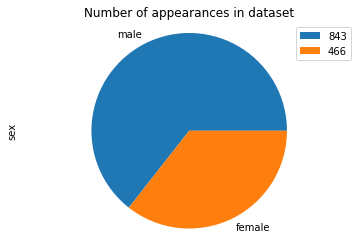

In [8]:
titanic['sex'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Number of appearances in dataset')
plt.legend(
titanic['sex'].value_counts())


# method to calculate Percentage in Pandas

In [19]:
a = titanic.groupby(['sex'],as_index = True).agg({'sex':'count'})

print(a)

print(float(a.sum()))
b = (a/float(a.sum()))*100
print(b)

        sex
sex        
female  466
male    843
1309.0
              sex
sex              
female  35.599694
male    64.400306


# autopct =%.2f  is for percentage values with 2 decimal places and legend loc = 2 for placing the legend at corresponding location (either left , right top , bottom)

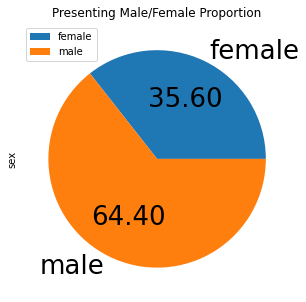

In [20]:

a.plot.pie(subplots=True,figsize = (10,5),fontsize = 26,autopct = '%.2f')
plt.title('Presenting Male/Female Proportion')
plt.legend(loc = 2)

# The other way of plotting Pie chart

# (x) for x in titanic['sex'].unique() this is required for printing unique values one after the other in the chart
a

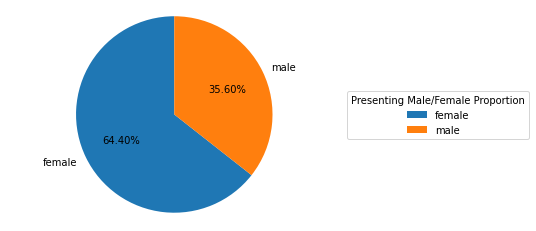

In [50]:

fig1,ax1 = plt.subplots()

ax1.pie(titanic['sex'].value_counts(),autopct = '%.2f%%',data=titanic,startangle=90,labels=[(x) for x in titanic['sex'].unique()])
ax1.axis('equal')

ax1.legend(titanic['sex'],title = "Presenting Male/Female Proportion",bbox_to_anchor=(1, 0, 0.5, 1),loc="center left")
plt.show()


# 2 )Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

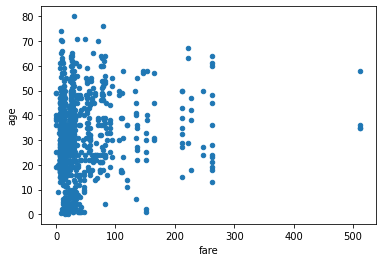

In [27]:
titanic.plot.scatter(x= 'fare',y = 'age')

# for coloring the scatter plot using sex dimension uisng seaborn

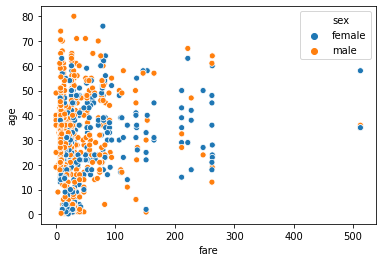

In [30]:
sns.scatterplot(x='fare',y='age',hue='sex',data=titanic)

# Scipy:

We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

Task:

1.	fitting it to the periodic function

2.	plot the fit Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


Text(0, 0.5, 'Min and max temperature')

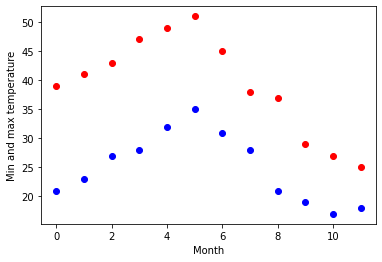

In [41]:
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(temp_max, 'ro')
plt.plot(temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')


In [51]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])


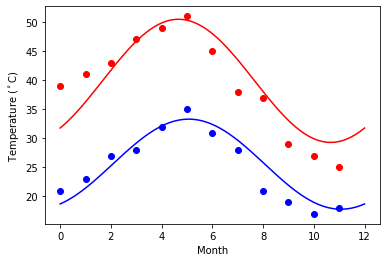

In [52]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()
